# Exercise 2

Work on this before the next lecture on 12 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

# Question 1

Build your own random forest classifier! Using the `DecisionTreeClassifier` from scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) construct your own `RandomForestClassifier`.

There are two methods for adding randomisation to the tree growing process:

* grow each tree on a bootstrap sample of the data
* configure each tree to select a subset of features for each split

Try out your new `RandomForestClassifier` on the https://archive.ics.uci.edu/ml/datasets/bank+marketing dataset.

**Note:** To test your classifier it is a good idea to use a smaller dataset like the `make_blobs` from the lecture. It will run much faster and be easier to debug.

* Can you show that a forest of trees that are all the same performs like a single decision tree?
* Can you compute the correlation coefficient between scores assigned by two different trees in the forest? In order to gain from buildign a forest you want your trees to not be 100% correlated. Experiment with the different randomisation strategies to check that they work.

In [2]:
# your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import matthews_corrcoef
from numpy import corrcoef
from utils import draw_tree
import numpy as np
import pandas as pd

#X, y = make_blobs(n_samples=400, centers=23, random_state=42)#Shoud change this to something from the bankDS
#y = np.take(labels, (y < 10))
#plt.scatter(X[:, 0], X[:, 1], c=y, lw=0)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")

data=pd.read_csv("bankDS/bank-full.csv", sep=";")#Loading the bank dataset with pandas
for column in data.columns:#Label encoder to convert the string data into appriopriate type
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

X = data.iloc[:, 0:15].values  # select columns 1 through 16
y = data.iloc[:, 16].values   # select column 17

labels = ["b", "r"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

voting = VotingClassifier([('tree1',DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=3, random_state=1)),
                           ('tree2',DecisionTreeClassifier(max_leaf_nodes=12, random_state=2))],
                          voting='soft', flatten_transform=True)
voting.fit(X_train, y_train)
print("Training score for RFC with diff trees:", voting.score(X_train, y_train))
print("Testing score for RFC with diff trees:", voting.score(X_test, y_test))

#Can you show that a forest of trees that are all the same performs like a single decision tree?
#As seen below, the scores from 1 single tree is indeed the same than the score from a voting including two times
#this tree as two "different" (but indeed identical) trees.
tree = DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=3, random_state=1).fit(X_train, y_train)
print("Training score for 1 tree:", tree.score(X_train, y_train))
print("Testing score for 1 tree:", tree.score(X_test, y_test))

voting = VotingClassifier([('tree1',DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=3, random_state=1)),
                           ('tree2',DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=3, random_state=1))],
                          voting='soft', flatten_transform=True)
voting.fit(X_train, y_train)
print("Training score for RFC with same trees (equal to score with only 1 tree):", voting.score(X_train, y_train))
print("Testing score for RFC with same trees (equal to score with only 1 tree):", voting.score(X_test, y_test))

#Can you compute the correlation coefficient between scores assigned by two different trees in the forest? 
#In order to gain from buildign a forest you want your trees to not be 100% correlated. 
#Experiment with the different randomisation strategies to check that they work.
voting = VotingClassifier([('tree1',DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=3, random_state=1)),
                           ('tree2',DecisionTreeClassifier(max_leaf_nodes=12, random_state=2))],
                          voting='soft', flatten_transform=True)
tree1=DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=3, random_state=1).fit(X_train, y_train)
tree2=DecisionTreeClassifier(max_leaf_nodes=12, random_state=2).fit(X_train, y_train)
print("Training score for first tree in the RFC", tree1.score(X_train, y_train))
print("Training score for second tree in the RFC", tree2.score(X_train, y_train))
corrcoef(tree1.score(X_train, y_train),tree2.score(X_train, y_train))
#Stuck here because argument for correlation coeff should be array. But scores are float... ??





/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprec

Training score for RFC with diff trees: 0.8886087148860872
Testing score for RFC with diff trees: 0.8843227461735822
Training score for 1 tree: 0.8855120548551205
Testing score for 1 tree: 0.883791913651243
Training score for RFC with same trees (equal to score with only 1 tree): 0.8855120548551205
Testing score for RFC with same trees (equal to score with only 1 tree): 0.883791913651243
Training score for first tree in the RFC 0.8855120548551205
Training score for second tree in the RFC 0.8886087148860872


/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


array([[nan, nan],
       [nan, nan]])

# Question 2

Use the ready made `RandomForestClassifier` from scikit-learn to create the best model you can for the Bank Marketing dataset. Use `GridSearchCV` (or any other method) to tune your model and possible pre-processing steps. Make sure you have a test set to use after you are done tuning to estimate your generalisation error.

/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/arnaud/anaconda2/envs/ATC2018/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

best mean cross-validation score: 0.900
best parameters: {'max_leaf_nodes': 28, 'n_estimators': 9}
test-set score: 0.898
Training score for classical RFC: 0.9988055739880557
Testing score for classical RFC: 0.9000707776696453
Prediction for classical RFC: [0 0 0 ... 0 0 0]


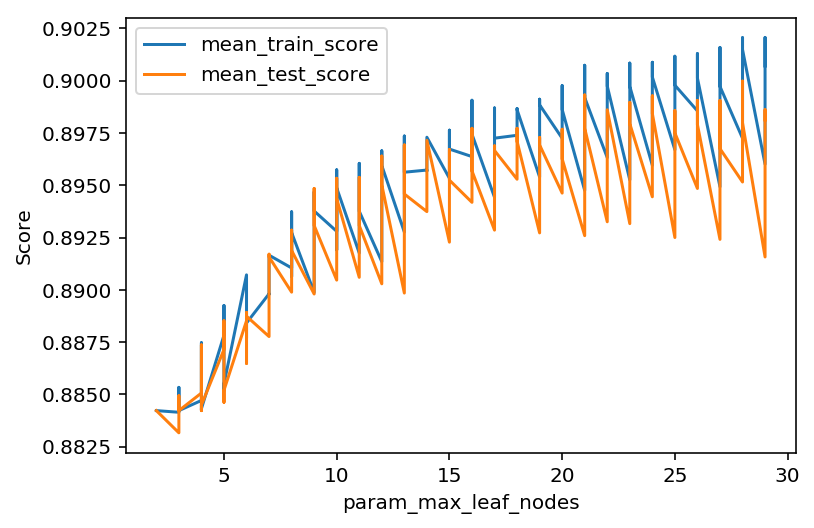

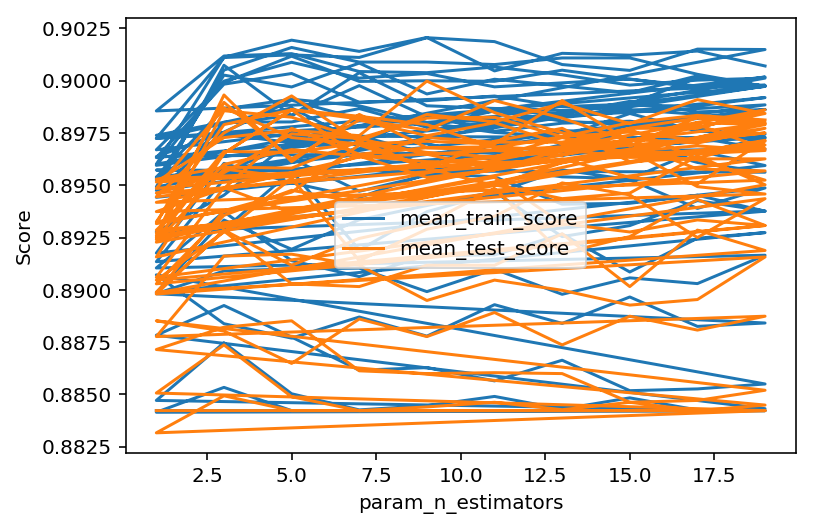

In [18]:
# your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from utils import draw_tree
import numpy as np
import pandas as pd

data=pd.read_csv("bankDS/bank-full.csv", sep=";")#Loading the bank dataset with pandas
for column in data.columns:#Label encoder to convert the string data into appriopriate type
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        
#bankFeatures = list(data.columns.values)
        
X = data.iloc[:, 0:16].values  # select columns 1 through 16
y = data.iloc[:, 16].values   # select column 17

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

param_grid = {'n_estimators':  np.arange(1, 20, 2), 'max_leaf_nodes':range(2,30)}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes',
            y=['mean_train_score', 'mean_test_score'],
           )
plt.legend(loc='best')
plt.ylabel('Score');
scores.plot(x='param_n_estimators',
            y=['mean_train_score', 'mean_test_score'],
           )
plt.legend(loc='best')
plt.ylabel('Score');

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

rfc = RandomForestClassifier(n_estimators=19)
rfc = rfc.fit(X_train,y_train)
print("Training score for classical RFC:", rfc.score(X_train, y_train))
print("Testing score for classical RFC:", rfc.score(X_test, y_test))
print("Prediction for classical RFC:", rfc.predict(X_test))


# Question 3

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the california housing dataset. You might have to tune `n_estimators` and other hyper-parameters to get good performance.

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [4]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

# your code here

# Question 4

Competition time! Use any model you want (and understand) to make the best model you can to predict the target in the below dataset.

Each student's submission will be ranked by:
* their performance (using [AUC ROC](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) as metric) and
* how well they did at predicting their generalisation error.

Your final rank will be the average of your two ranks.

To evaluate how good you did at predicting your generalisation error Tim will release a fresh test data set after the hand-in deadline. You can then re-run your trained classifier on that data and score its performance. We will rank students by the difference between that score and their predicted score.

You can read in the data using the `pandas` library. The final column of the file contains the target (zero or one).

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from utils import draw_tree
import numpy as np
import pandas as pd

# you might have to adjust the path to the dataset
df_original = pd.read_csv("challenge-train.csv", header=None)
df_original.head()
df_train = df_original.drop([46], axis=1)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,47,48
0,0.000576,0.999939,12.769232,0.584357,0.136273,13.359463,3.358099,14655.587891,0.005370,0.041032,...,376.700348,58935.695312,74241.648438,4598.116699,2.897916,2.932629,3.193417,267,0.381424,0
1,0.001807,0.999996,18.585171,0.368892,0.054991,3.600483,6.781577,4145.290527,0.030382,0.034570,...,2028.605591,20553.839844,12501.964844,28162.607422,3.584545,3.010242,3.322494,128,0.781520,1
2,0.000858,0.999304,4.794842,0.149876,0.172385,16.130068,3.723242,4936.734375,0.017344,0.027622,...,2874.089600,7566.020020,11801.971680,16086.186523,2.700943,2.920070,2.407294,254,0.508650,0
3,0.001519,0.999969,15.656528,0.312301,0.125831,8.113082,5.763765,4948.376465,0.035185,0.038973,...,1488.869995,19161.880859,18598.472656,17658.548828,3.108439,2.932674,3.164568,531,0.682114,0
4,0.000936,0.999978,8.998086,0.475861,0.065347,3.863127,3.675261,4757.155762,0.022795,0.046165,...,342.455688,12651.365234,33099.660156,10722.979492,2.873017,3.074762,4.136894,160,0.633693,1


In [27]:
# convert the pandas dataframe to a numpy array
# make sure you do not include the final column
# in your training data (X) but store it as target (y)
X = df_train.as_matrix()[:, :-1]
y = df_train.as_matrix()[:, -1]

labels = ["b", "r"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

rfc = RandomForestClassifier(n_estimators=32)
rfc = rfc.fit(X_train,y_train)
#print("Training score for RFC:", rfc.score(X_train, y_train))
print("Testing score for RFC:", rfc.score(X_test, y_test))
print("Prediction for RFC:", rfc.predict(X_test))

Testing score for RFC: 0.8942222222222223
Prediction for RFC: [1. 0. 1. ... 1. 0. 0.]


In [7]:
X.shape

(45000, 47)

In [8]:
y.shape

(45000,)